In [119]:
import gzip
import ast
import json
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import pandas as pd
import string
import random
import string
from sklearn import linear_model
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import dateutil.parser
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data1 = []
with open("australian_users_items.json", 'r', encoding="utf-8") as file:
    for line in file:
        l = ast.literal_eval(line)
        data1.append(l)

In [3]:
data2 = []
with open("australian_user_reviews.json", 'r', encoding="utf-8") as file:
    for line in tqdm(file):
        l = ast.literal_eval(line)
        data2.append(l)

25799it [00:02, 11860.01it/s]


In [4]:
item_purchase = defaultdict(int)
user_purchase = defaultdict(int)
purchase = 0
not_play = 0
item_name =  defaultdict(str)
item_play_hours = defaultdict(int)
item_play_hours_2weeks = defaultdict(int)
for i in tqdm(data1):
    purchase += i['items_count']
    user_purchase[i['items_count']] += 1
    for j in i['items']:
        item_name[j['item_id']] = j['item_name']
        item_purchase[j['item_name']] += 1
        item_play_hours[j['item_name']] += j['playtime_forever']
        item_play_hours_2weeks[j['item_name']] += j['playtime_2weeks']
        if j['playtime_forever'] == 0:
            not_play += 1 

100%|██████████| 88310/88310 [00:05<00:00, 17123.45it/s]


In [5]:
reviews_count = 0
recommend_count = 0
reviews_item = defaultdict(int)
recommend_item = defaultdict(int)
not_recommend_item = defaultdict(int)

In [6]:
for i in data2:
    for j in i['reviews']:
        reviews_count += 1
        reviews_item[j['item_id']] += 1
        if j['recommend'] == True:
            recommend_count += 1
            recommend_item[j['item_id']] += 1
        else:
            not_recommend_item[j['item_id']] += 1

In [7]:
item_purchase_list = sorted(item_purchase.items(), key=lambda item: item[1], reverse = True)
user_purchase_list = sorted(user_purchase.items(), reverse = True)

In [8]:
reviews_item_list = sorted(reviews_item.items(), key=lambda item: item[1], reverse = True)
recommend_item_list = sorted(recommend_item.items(), key=lambda item: item[1], reverse = True)
not_recommend_item_list = sorted(not_recommend_item.items(), key=lambda item: item[1], reverse = True)

In [9]:
item_play_hours_list = sorted(item_play_hours.items(), key=lambda item: item[1], reverse = True)
item_play_hours_2weeks_list = sorted(item_play_hours_2weeks.items(), key=lambda item: item[1], reverse = True)

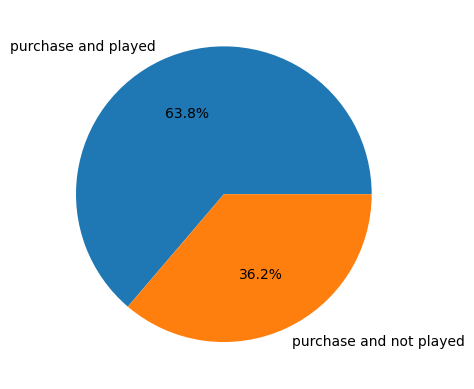

In [10]:
labels = ['purchase and played', 'purchase and not played']
sizes = [(purchase-not_play), not_play]  # 每个部分的数值
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [95]:
purchase- not_play

3285246

In [94]:
not_play

1867963

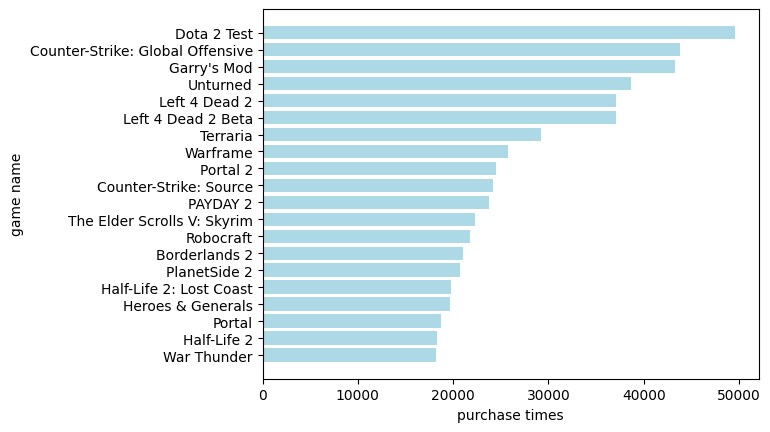

In [11]:
x = []
y = []
for i in item_purchase_list[0:20]:
    x.append(i[1])
    y.append(i[0])

x.reverse() 
y.reverse() 
plt.barh(y, x, color='lightblue')

# 添加标题和轴标签
plt.xlabel("purchase times")
plt.ylabel("game name")

# 显示图表
plt.show()

In [97]:
sum(row[1] for row in item_purchase_list)

5153209

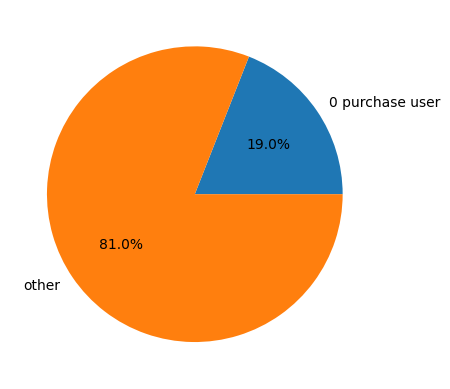

In [12]:
labels = ['0 purchase user','other']
sizes = [user_purchase_list[-1][1], sum(row[1] for row in user_purchase_list)- user_purchase_list[-1][1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [89]:
user_purchase_list[-1]

(0, 16806)

In [88]:
user_purchase_list[0]

(7762, 1)

In [90]:
sum(row[1] for row in user_purchase_list)

88310

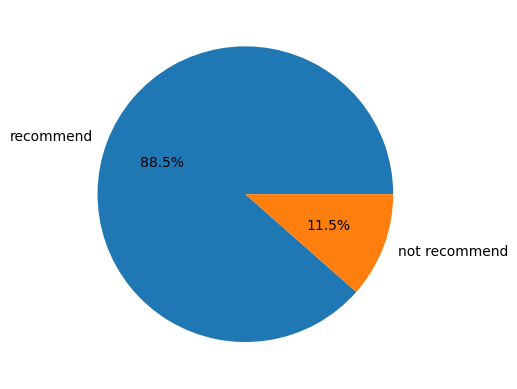

In [75]:
labels = ['recommend','not recommend']
sizes = [recommend_count, reviews_count-recommend_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [14]:
reviews_count

59305

In [15]:
recommend_count

52473

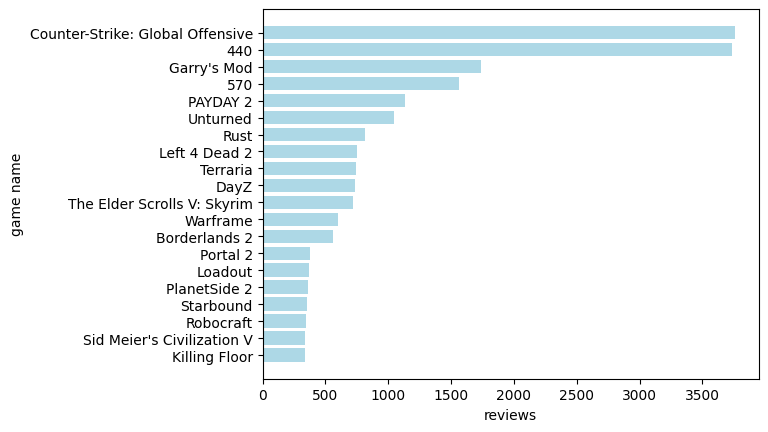

In [16]:
reviews_item_list[0]
x = []
y = []
for i in reviews_item_list[0:20]:
    x.append(i[1])
    if item_name[i[0]] == '':
        y.append(i[0])
    else:
        y.append(item_name[i[0]])

x.reverse() 
y.reverse() 
plt.barh(y, x, color='lightblue')

# 添加标题和轴标签
plt.xlabel("reviews")
plt.ylabel("game name")

# 显示图表
plt.show()

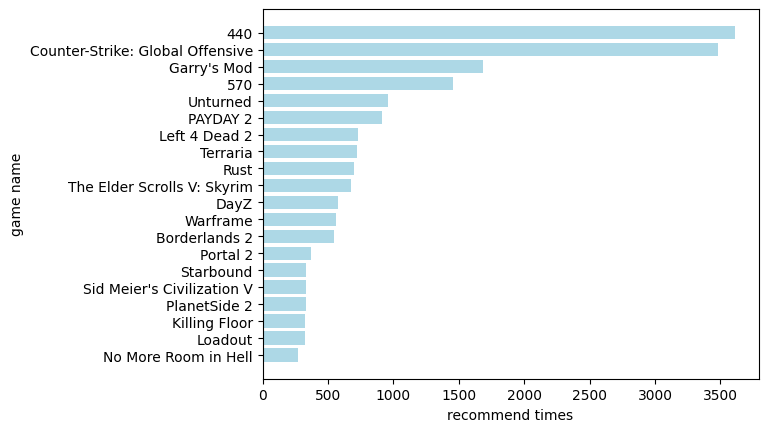

In [17]:
x = []
y = []
for i in recommend_item_list[0:20]:
    x.append(i[1])
    if item_name[i[0]] == '':
        y.append(i[0])
    else:
        y.append(item_name[i[0]])

x.reverse() 
y.reverse() 
plt.barh(y, x, color='lightblue')

# 添加标题和轴标签
plt.xlabel("recommend times")
plt.ylabel("game name")

# 显示图表
plt.show()

In [80]:
not_recommend_item_list[0:3]

[('730', 281), ('218620', 227), ('221100', 162)]

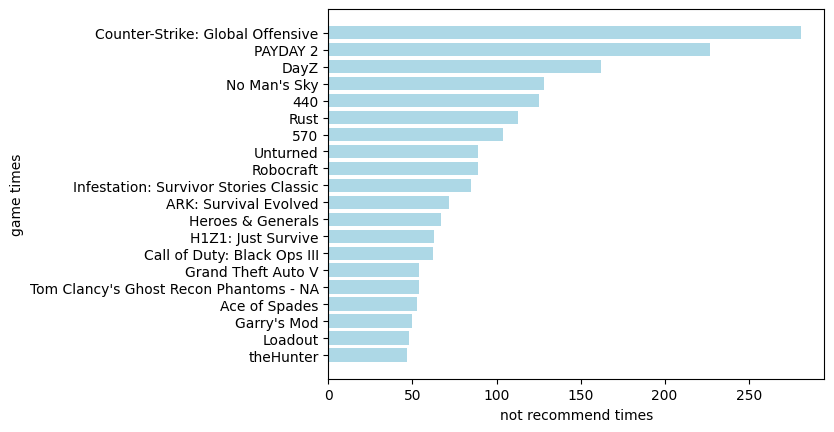

In [18]:
x = []
y = []
for i in not_recommend_item_list[0:20]:
    x.append(i[1])
    if item_name[i[0]] == '':
        y.append(i[0])
    else:
        y.append(item_name[i[0]])

x.reverse() 
y.reverse() 
plt.barh(y, x, color='lightblue')

# 添加标题和轴标签
plt.xlabel("not recommend times")
plt.ylabel("game times")

# 显示图表
plt.show()

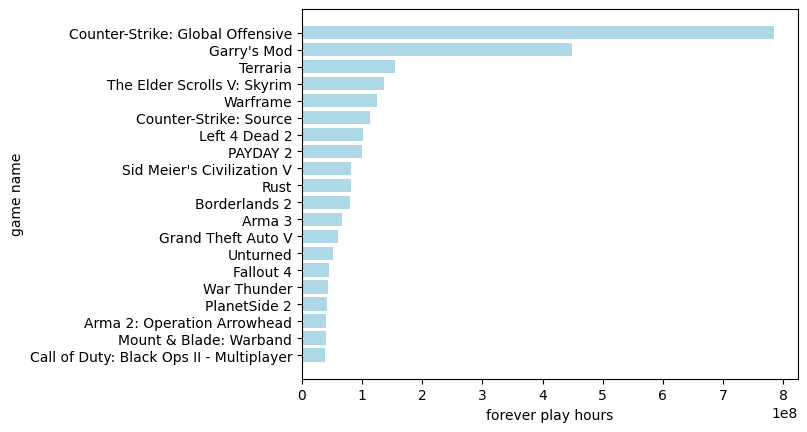

In [19]:
x = []
y = []
for i in item_play_hours_list[0:20]:
    x.append(i[1])
    y.append(i[0])


x.reverse() 
y.reverse() 
plt.barh(y, x, color='lightblue')

# 添加标题和轴标签
plt.xlabel("forever play hours")
plt.ylabel("game name")

# 显示图表
plt.show()

In [100]:
sum(row[1] for row in item_play_hours_list)

5109381683

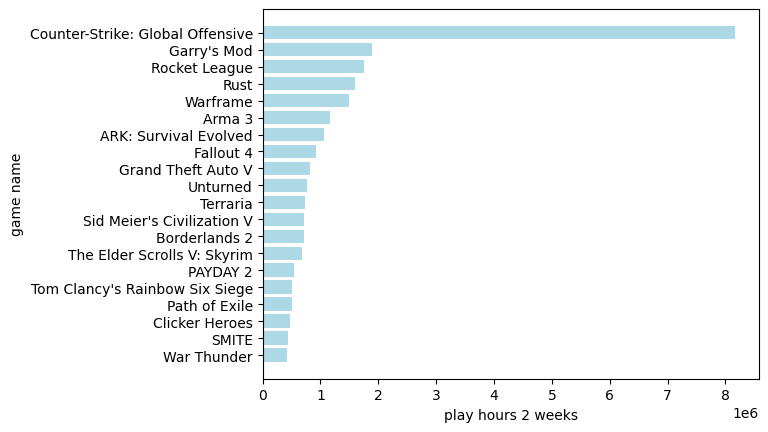

In [20]:
x = []
y = []
for i in item_play_hours_2weeks_list[0:20]:
    x.append(i[1])
    y.append(i[0])


x.reverse() 
y.reverse() 
plt.barh(y, x, color='lightblue')

# 添加标题和轴标签
plt.xlabel("play hours 2 weeks")
plt.ylabel("game name")

# 显示图表
plt.show()

In [102]:
sum(row[1] for row in item_play_hours_2weeks_list)

46918458

In [22]:
dataset = []

In [23]:
for i in data2:
    user_id = i['user_id']
    for j in i['reviews']:
        dataset.append([user_id, j['item_id'], j['recommend']])

In [24]:
len(dataset)

59305

In [25]:
user_item = defaultdict(dict)
for i in data1:
    user_id = i['user_id']
    for j in i['items']:
        user_item[user_id][j['item_id']] = [j['playtime_forever'], j['playtime_2weeks']]

In [26]:
combine_dataset = []
for i in dataset:
    user_id = i[0]
    item_id = i[1]
    if user_id in user_item:
        userdict = user_item[user_id]
        if item_id in userdict:
            combine_dataset.append(i + userdict[item_id])

In [27]:
len(combine_dataset)

44890

In [28]:
combine_dataset[1000]

['ConkerBirdy', '239140', True, 2401, 0]

In [29]:
 user_item['ConkerBirdy']['239140']

[2401, 0]

In [30]:
not_playgame = defaultdict(set)
for i in data1:
    user_id = i['user_id']
    for j in i['items']:
        if j['playtime_forever'] == 0:
            not_playgame[user_id].add(j['item_id'])

In [31]:
negative_list = []
for i in tqdm(range(30000)):
    r_user = random.choice(combine_dataset)
    user_id = r_user[0]
    if not_playgame[user_id]:
        r_item = random.choice(list(not_playgame[user_id])) 
        negative_list.append([user_id, r_item, False, 0, 0]) 

100%|██████████| 30000/30000 [00:00<00:00, 192915.18it/s]


In [32]:
len(negative_list)

29869

In [33]:
combine_dataset = combine_dataset+negative_list

In [34]:
len(combine_dataset)

74759

In [35]:
counts = 0
for i in combine_dataset:
    if i[2] != True:
        counts += 1

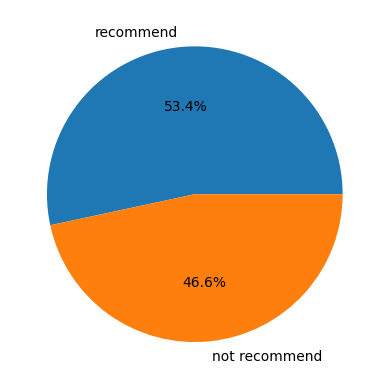

In [36]:
labels = ['recommend','not recommend']
sizes = [len(combine_dataset)-counts, counts]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [37]:
X = [i[0:1] + [i[3]]  for i in combine_dataset]
y = [int(i[2]) for i in combine_dataset]

In [38]:
item_freq = defaultdict(int)
for i in combine_dataset:
    item_freq[i[1]] += 1
item_freq = dict(sorted(item_freq.items(), key=lambda item: item[1], reverse = True))

In [39]:
combine_dataset[0]

['76561197970982479', '1250', True, 10006, 0]

In [40]:
item_freq['1250']

277

In [41]:
popular = set()
count = 0
for key, value in item_freq.items():
    popular.add(key)
    count += value
    if count > len(combine_dataset)*0.8:
        break

In [42]:
len(popular)

726

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_test[0]

['76561198083640655', 0]

In [45]:
y_pred = []
for i in X_test:
    if i[1] in popular:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [46]:
accuracy = accuracy_score(y_test, y_pred)

In [47]:
accuracy

0.4710406634563938

In [120]:
X = [[i[3]] for i in combine_dataset]
y = [int(i[2]) for i in combine_dataset]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mod = linear_model.LogisticRegression(C=1)
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(accuracy, precision, recall, f1, auc_score)

0.7310058855002676 0.9225918677973473 0.5364774307750664 0.6784457946913975 0.7429653943595622


In [50]:
accuracy

0.7310058855002676

In [51]:
sum(y_test)/len(y_test)

0.5289593365436062

In [115]:
X = [[i[3]] for i in combine_dataset]
y = [int(i[2]) for i in combine_dataset]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Make labels 2D for BCEWithLogitsLoss
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the Deep Neural Network
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),  # Input to hidden layer
            nn.ReLU(),                           # Activation function
            nn.Linear(hidden_size, hidden_size), # Second hidden layer
            nn.ReLU(),                           # Activation function
            nn.Linear(hidden_size, output_size), # Output layer
        )
    
    def forward(self, x):
        return self.model(x)

# Model Parameters
input_size = 1       # One feature: playtime_forever
hidden_size = 16     # Number of neurons in the hidden layers
output_size = 1      # Binary classification output

model = DNN(input_size, hidden_size, output_size)

# Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy with logits for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
epochs = 100
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss for every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the Model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred = torch.sigmoid(model(X_test))  # Apply sigmoid to get probabilities
    y_pred_labels = (y_pred > 0.5).float()  # Convert probabilities to binary labels (0 or 1)


Epoch [10/100], Loss: 14.3989
Epoch [20/100], Loss: 9.8888
Epoch [30/100], Loss: 3.5776
Epoch [40/100], Loss: 2.1890
Epoch [50/100], Loss: 1.0740
Epoch [60/100], Loss: 1.7689
Epoch [70/100], Loss: 1.9084
Epoch [80/100], Loss: 0.8388
Epoch [90/100], Loss: 2.0538
Epoch [100/100], Loss: 0.7733


In [123]:
y_pred = y_pred_labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(accuracy, precision, recall, f1, auc_score)

0.9123194221508828 0.9031036168132942 0.9345049943102794 0.9185360094451004 0.9109554646405863


In [124]:
X = [[i[3]] for i in combine_dataset]
y = [int(i[2]) for i in combine_dataset]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(accuracy, precision, recall, f1, auc_score)

0.5645398608881755 0.9160714285714285 0.19458844354532812 0.32099280425487536 0.5872842828261924


In [126]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# 训练模型
rf_clf.fit(X_train, y_train)
# 预测
y_pred = rf_clf.predict(X_test)

In [127]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(accuracy, precision, recall, f1, auc_score)

0.9285714285714286 0.8823069185201744 0.9981034264761663 0.9366397721879449 0.9242966372761351


In [128]:
cf_data = [i[0:2] + [int(i[2])] for i in combine_dataset]
train_data, test_data = train_test_split(cf_data, test_size=0.2, random_state=42)

In [129]:
def Jaccard(s1, s2):
    intersection = s1.intersection(s2)
    union = s1.union(s2)
    if len(union) == 0:
        return 0
    else:
        return len(intersection) / len(union)

In [130]:
GamesPerUser_r = defaultdict(set)
UsersPerGame_r = defaultdict(set)
GamesPerUser_nr = defaultdict(set)
UsersPerGame_nr = defaultdict(set)
for u,g,r in train_data:
    if r == 1:
        GamesPerUser_r[u].add(g)
        UsersPerGame_r[g].add(u)
    else:
        GamesPerUser_nr[u].add(g)
        UsersPerGame_nr[g].add(u)

In [131]:
def mostSimilar_u(u, g):
    top_s_r = 0
    top_s_nr = 0
    for i in UsersPerGame_r[g]:
        s1 = Jaccard(GamesPerUser_r[u], GamesPerUser_r[i])
        s2 = Jaccard(GamesPerUser_nr[u], GamesPerUser_nr[i])
        s = s1 + s2
        if s > top_s_r:
            top_s_r = s
    for i in UsersPerGame_nr[g]:
        s1 = Jaccard(GamesPerUser_r[u], GamesPerUser_r[i])
        s2 = Jaccard(GamesPerUser_nr[u], GamesPerUser_nr[i])
        s = s1 + s2
        if s > top_s_nr:
            top_s_nr = s
    if top_s_nr > top_s_r:
        return 0
    else:
        return 1

In [132]:
def mostSimilar_u_nr(u, g):
    top_s = 0
    for i in UsersPerGame_nr[g]:
        s = Jaccard(GamesPerUser_nr[u], GamesPerUser_nr[i])
        if s > top_s:
            top_s = s
    return top_s

In [133]:
correct = 0
y_pred = []
y_test = []
see = []
for u,g,r in test_data:
    pred = mostSimilar_u(u, g)
    y_test.append(r)
    y_pred.append(pred)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(accuracy, precision, recall, f1, auc_score)

0.6838550026752274 0.6532755298651253 0.8573776710077128 0.7415386297774619 0.6731869187070368


In [135]:
from surprise import Dataset, Reader
from surprise import SVDpp
from surprise.model_selection import train_test_split
from surprise import accuracy

lfm_data = [i[0:2] + [int(i[2])] for i in combine_dataset]
reader = Reader(rating_scale=(0, 1))
df = pd.DataFrame(lfm_data, columns = ['user','item','recommend'])
data = Dataset.load_from_df(df[['user','item','recommend']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# 初始化 SVD++ 模型
model = SVDpp()

# 训练模型
model.fit(trainset)

# 在测试集上预测
predictions = model.test(testset)
y_pred = [round(i.est) for i in predictions]
y_test = [i[2] for i in testset]

In [136]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(accuracy, precision, recall, f1, auc_score)

0.7851123595505618 0.7763021134080148 0.8404601150287572 0.8071081227111725 0.7809576962834324
